<a href="https://colab.research.google.com/github/cosmicishan/EDA-on-Rain-Dataset/blob/main/Rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Library and Datasets

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [130]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/weatherAUS.csv')

# Checking Statistics 

In [131]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [133]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Visualising/Feature Handling

In [134]:
# Replacing string of Yes or No with 1 or 0 

df["RainTomorrow"].replace({"Yes": "1", "No": "0"}, inplace=True)

In [135]:
# Dropping all the missing values on dependent variable

df.dropna(subset = ["RainTomorrow"], inplace=True)

In [136]:
# Changing datatype to integer

df = df.astype({"RainTomorrow": int})

In [137]:
df["RainTomorrow"]

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 142193, dtype: int64

### Visualizing the correlations between numerical features of the data.



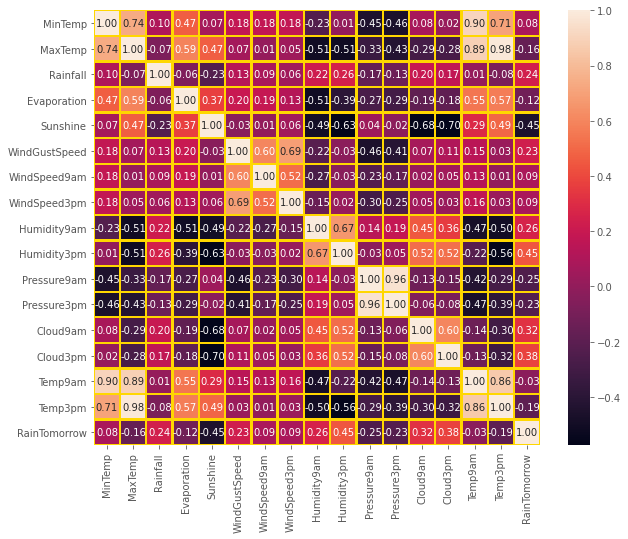

In [138]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(),robust=True,fmt='.2f',linewidths=1.3,linecolor = 'gold', annot=True,);

There's some variables that are correlated with each other that would be unnecesary so we will remove that during the time of training. 

### Getting list od numeric and categorical column

In [139]:
numeric_col = df.select_dtypes(include='float64').columns
categorical_col = df.select_dtypes(include='object').columns

In [140]:
numeric_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [141]:
categorical_col

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')

### Visualizing the correlation between all Categorical Variable and dependent variable (RainTomorrow)

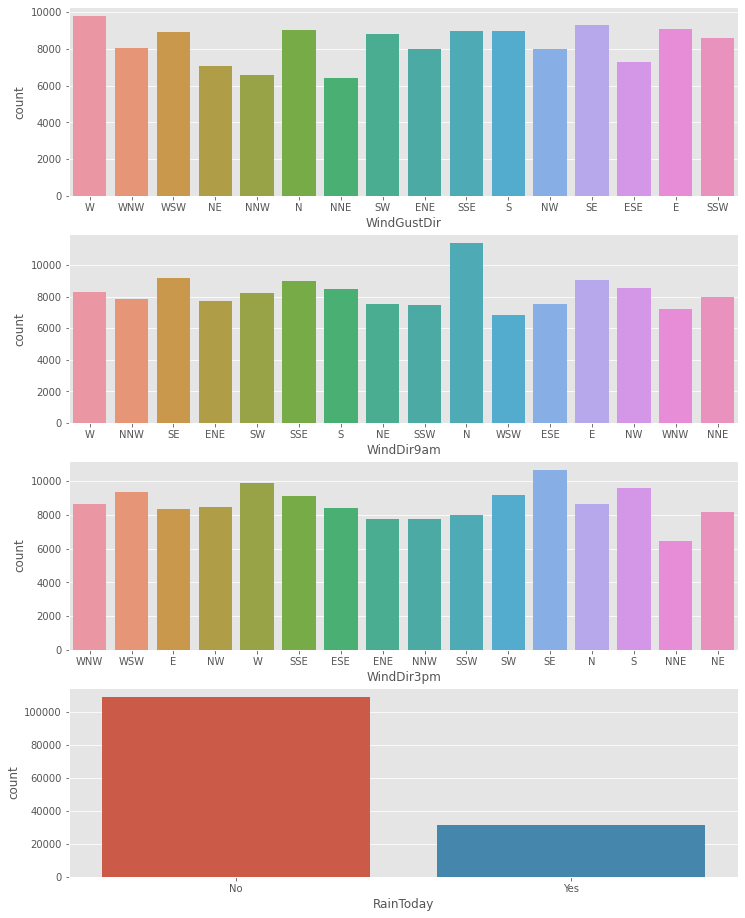

In [142]:
fig, ax = plt.subplots(4,1 ,figsize=(12, 16))

sns.countplot(x = df['WindGustDir'], ax=ax[0])
sns.countplot(x = df['WindDir9am'], ax=ax[1])
sns.countplot(x = df['WindDir3pm'], ax=ax[2])
sns.countplot(x = df['RainToday'], ax=ax[3])

fig.show()

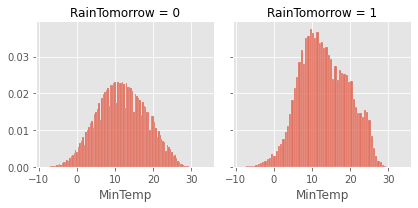

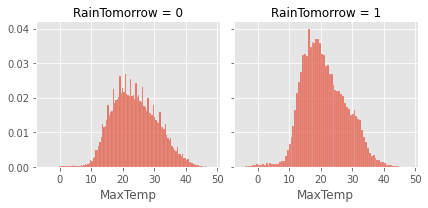

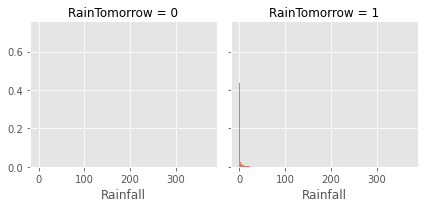

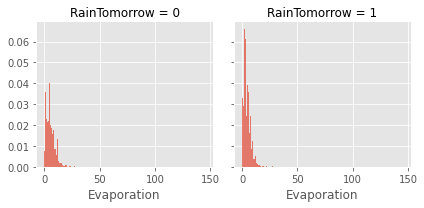

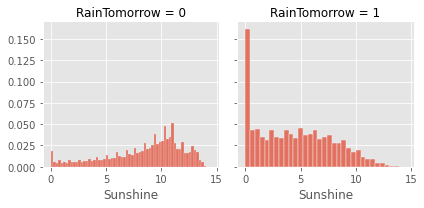

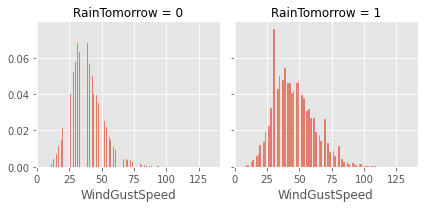

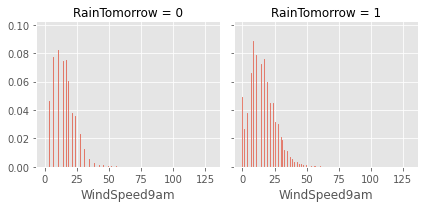

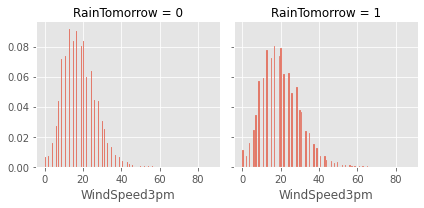

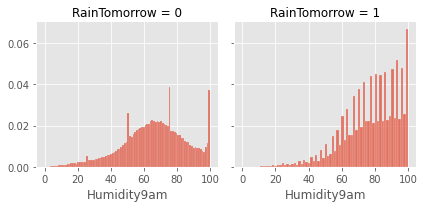

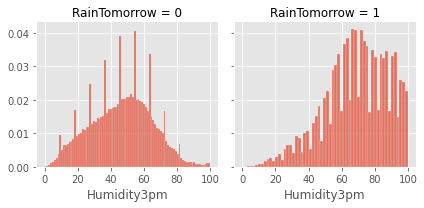

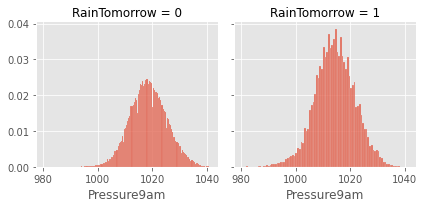

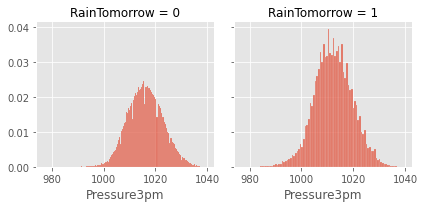

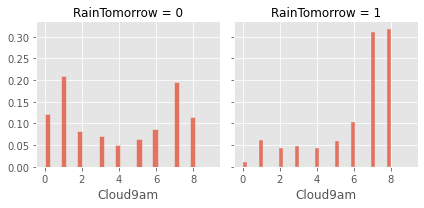

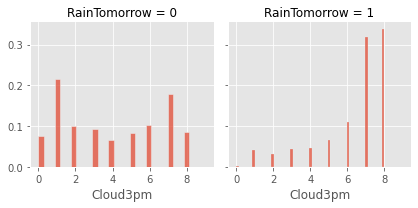

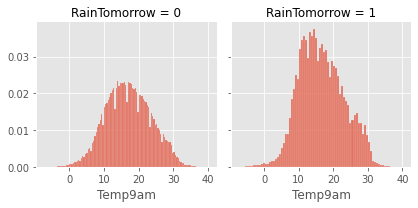

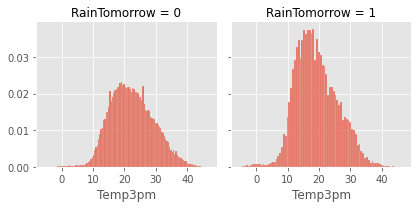

In [143]:
def plot(df, x):
  g = sns.FacetGrid(df, col = "RainTomorrow")
  g.map(sns.histplot, x, stat = 'probability')
  plt.show()

for i in numeric_col:
  plot(df, i)

### Checking outliers through box-plot

In [144]:
# view summary statistics in numerical variables

print(round(df[numeric_col].describe()),2)

        MinTemp   MaxTemp  Rainfall  ...  Cloud3pm   Temp9am   Temp3pm
count  141556.0  141871.0  140787.0  ...   85099.0  141289.0  139467.0
mean       12.0      23.0       2.0  ...       5.0      17.0      22.0
std         6.0       7.0       8.0  ...       3.0       6.0       7.0
min        -8.0      -5.0       0.0  ...       0.0      -7.0      -5.0
25%         8.0      18.0       0.0  ...       2.0      12.0      17.0
50%        12.0      23.0       0.0  ...       5.0      17.0      21.0
75%        17.0      28.0       1.0  ...       7.0      22.0      26.0
max        34.0      48.0     371.0  ...       9.0      40.0      47.0

[8 rows x 16 columns] 2


On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

We can draw boxplots to visualise outliers in the above variables.

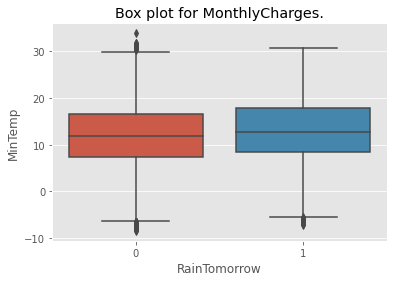

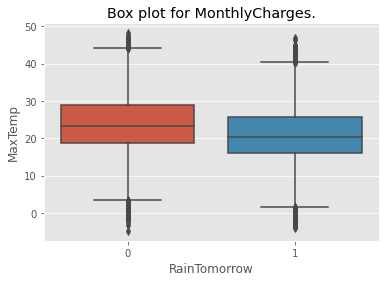

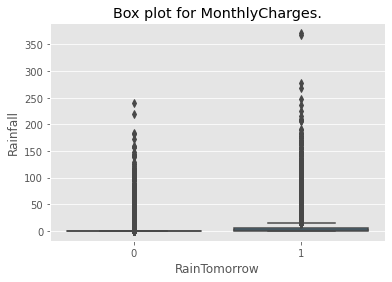

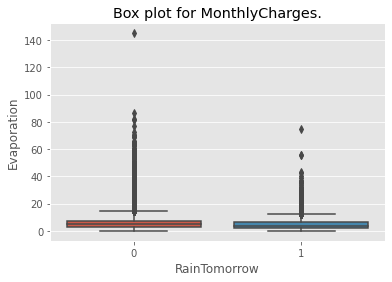

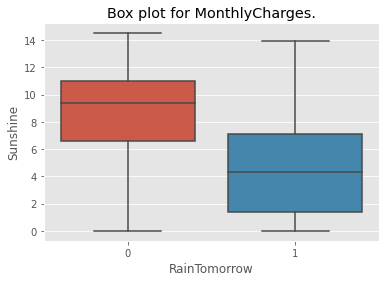

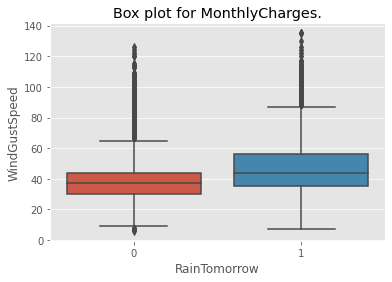

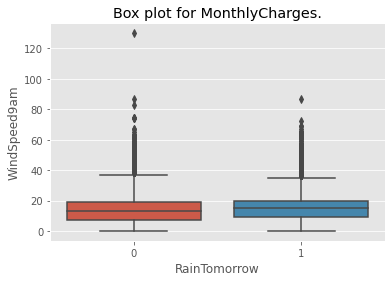

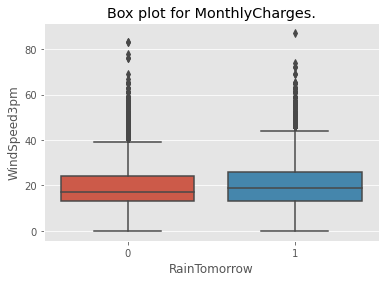

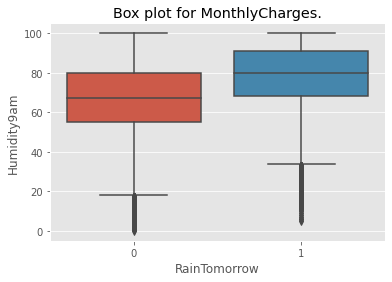

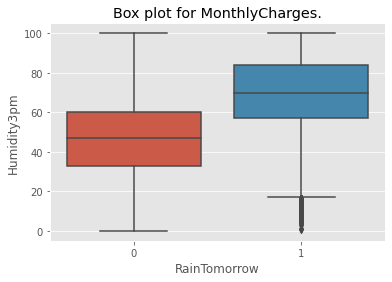

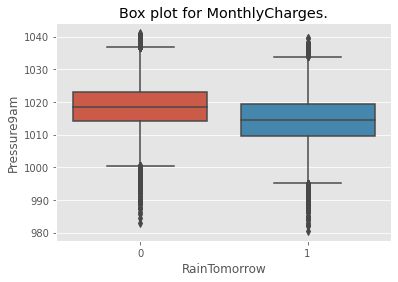

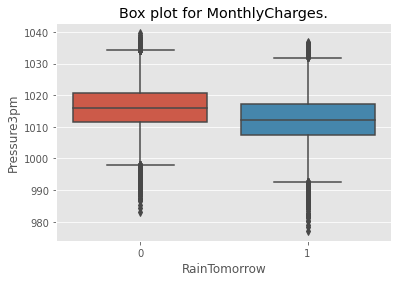

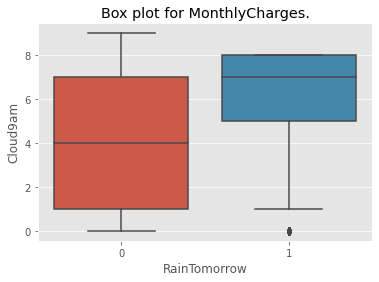

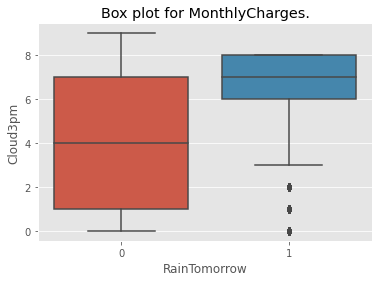

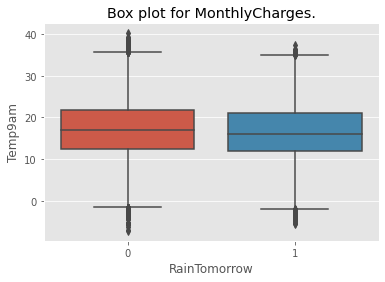

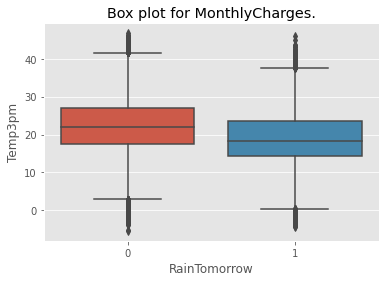

In [145]:
def plot(df, col):
  sns.boxplot(x='RainTomorrow', y=col, data=df).set_title("Box plot for MonthlyCharges.")
  plt.show()

for i in numeric_col:
  plot(df, i)

We can use interquantile range to find outliers in the features we think contains outliers.

In [146]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [147]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [148]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [149]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


As we see there are many outliers in many features, we will deal with it during implementing Algorithms.

### Check the distribution of variables

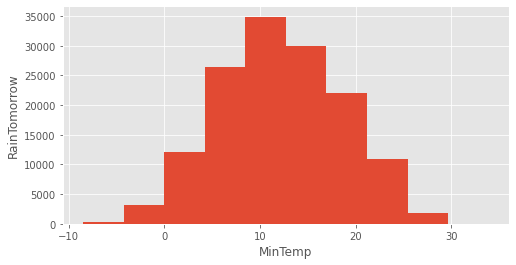

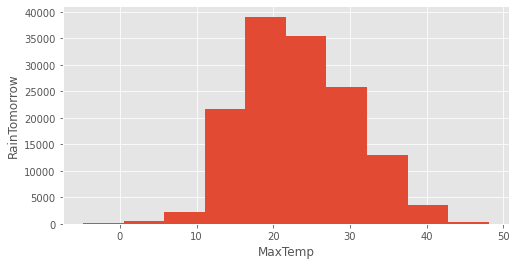

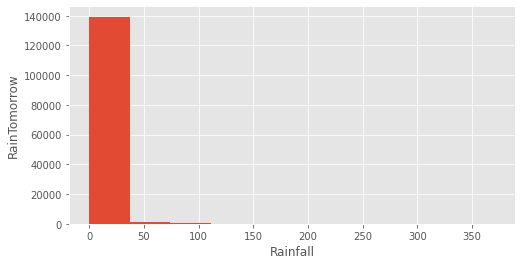

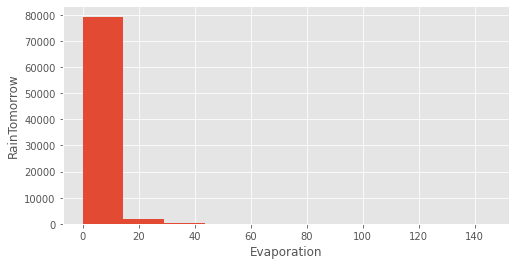

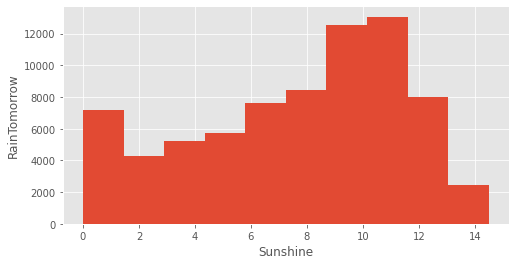

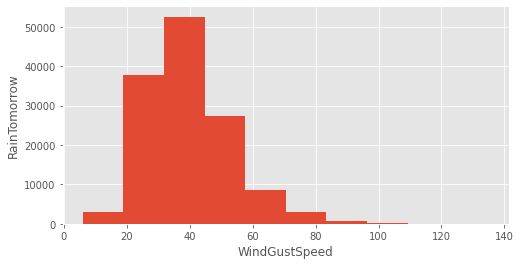

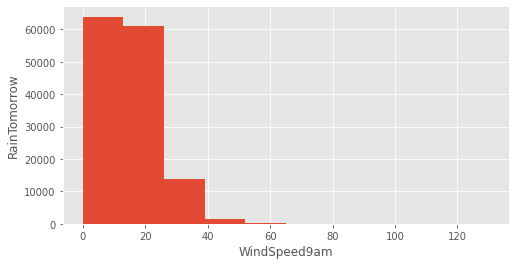

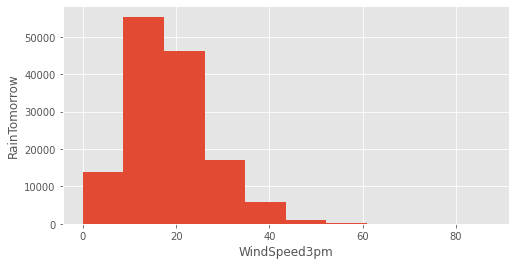

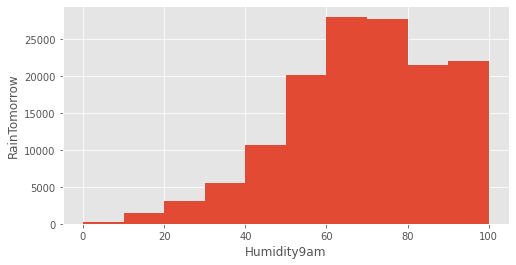

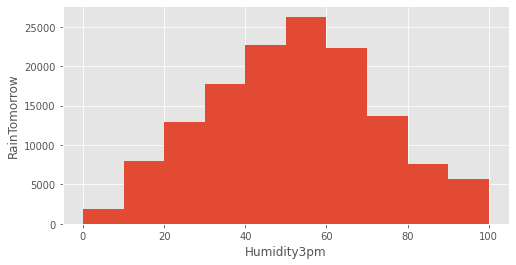

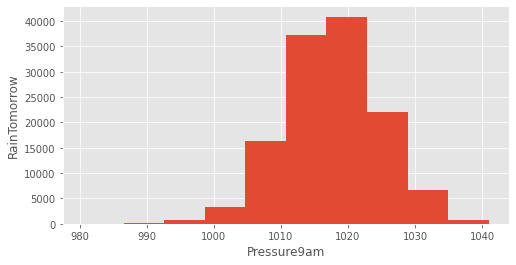

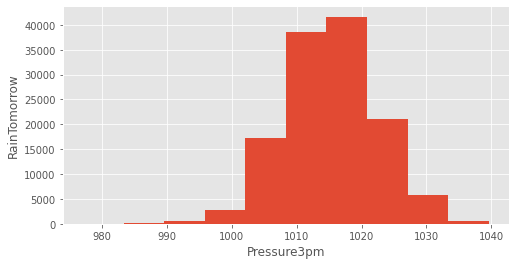

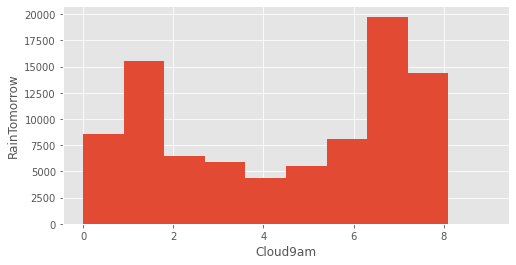

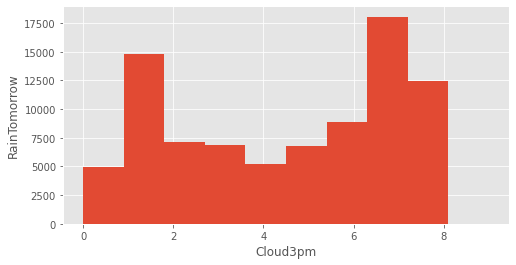

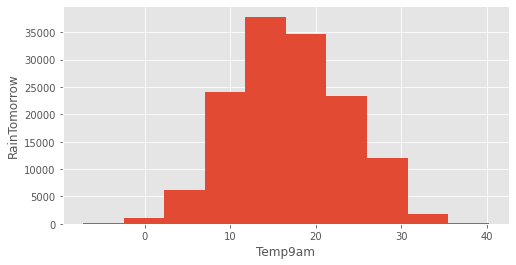

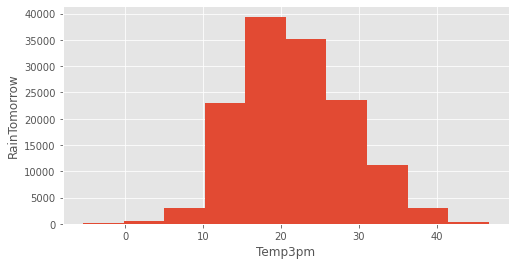

In [150]:
def plot(df, col):

  plt.figure(figsize=(8,4))
  fig = df[col].hist(bins=10)
  fig.set_xlabel(col)
  fig.set_ylabel('RainTomorrow')

for i in numeric_col:
  plot(df, i)

### Feature Engineering of Date Variable

In [151]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [152]:
# extract year,month and day from date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [153]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [154]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5


### Handling Missing Values

#### Numerical Columns

In [155]:
# check missing values in numerical variables

df[numeric_col].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64


We can use Linear Interpolation. It's a technique use to handle the missing value in Numerical variables because Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilizes non-missing values from adjacent data points to compute a value for a missing data point.

In [156]:
for i in numeric_col:
  df[i] = df[i].interpolate(method='linear')
  df[i] = df[i].interpolate(method='linear')

#### Categorical Columns

In [157]:
categorical_col = categorical_col[1::]

In [158]:
# check missing values in Categorical variables

df[categorical_col].isnull().sum()

Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

In [159]:
# Checking numbers of unique values

for i in categorical_col:
  print("Number of unique values for {} : {}".format(i,len(df[i].unique())))

Number of unique values for Location : 49
Number of unique values for WindGustDir : 17
Number of unique values for WindDir9am : 17
Number of unique values for WindDir3pm : 17
Number of unique values for RainToday : 3


Apply one-hot encoding by taking dummy variables would solve the problem of missing values as it will ignore the NaN values.

In [160]:
one_hot_col = categorical_col

In [161]:
df = pd.get_dummies(df, columns = one_hot_col)

In [162]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=119)